In [1]:
import numpy as np
import pandas as pd 
import scanpy as sc
import utils
import mrf
import os 
import random 
import imp
import mrf

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_6176/1071779760.py:8: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
imp.reload(mrf)

<module 'mrf' from '/home/qinxianhan/project/spatial/Hidden_Markov_Random_Field/src/mrf.py'>

In [3]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))
import seaborn as sns

In [4]:
adata = sc.read_visium('../../dataset/goldStandard')
adata = utils.data_preprocess(adata)

/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qinxianhan/.conda/envs/sc/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)

In [98]:
coord = np.array(adata.obs.iloc[:,1:3])
target_gene ='NEFH' 

In [112]:
beta =5
labels_mtx = mrf.mrf_process(adata, gene_id=target_gene, beta = beta,max_iteration=3e4)

  2%|▏         | 531/30000 [00:00<00:05, 5302.87it/s]

100%|██████████| 30000/30000 [00:05<00:00, 5925.35it/s]

12908 pixels changed after 30000 iterations


In [ ]:
labels_mtx.sum()

In [78]:
exp = adata[:, target_gene].X

In [79]:
from sklearn import mixture 

In [80]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(exp)
cls_para = gmm.means_.reshape(-1), gmm.covariances_.reshape(-1)
cls_para

(array([ 0.66580184, -1.20072436]), array([3.11337e-01, 1.00000e-06]))

In [81]:
np.array(cls_para).T

array([[ 6.65801844e-01,  3.11337000e-01],
       [-1.20072436e+00,  1.00000000e-06]])

In [82]:
cls_para[0]

array([ 0.66580184, -1.20072436])

In [102]:
label = gmm.predict(exp)
label.sum()

1297

In [113]:
adata.obs['old_labels'], adata.obs['new_labels'] = label, labels_mtx

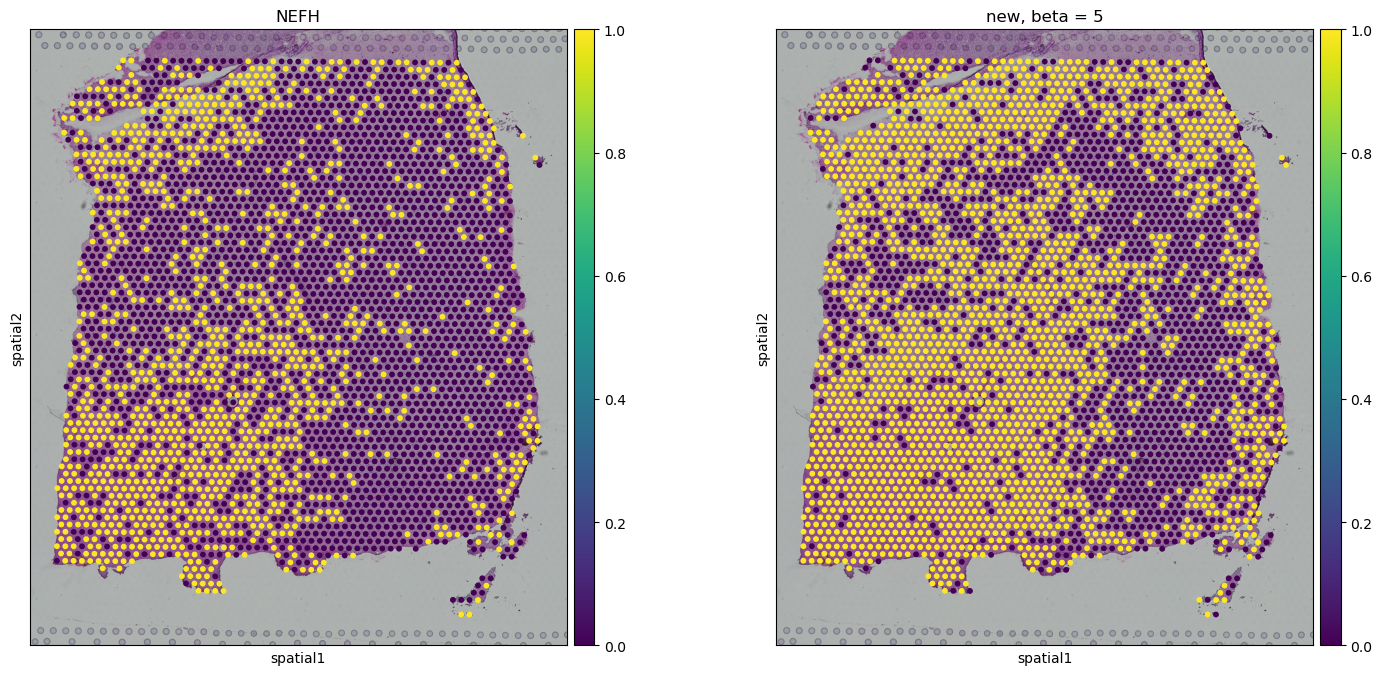

In [114]:
sc.pl.spatial(adata, color = ['old_labels', 'new_labels'], title=[target_gene, f'new, beta = {beta}'])

In [111]:
labels_mtx[labels_mtx==0] = -1
labels_mtx[labels_mtx==1] = 0
labels_mtx[labels_mtx==-1 ] = 1

In [41]:
labels_mtx.sum()

0.0